# Practice
Failure to see a doctor is a serious public health problem. Missed appointments cost the US healthcare system nearly [$ 200 each](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4714455/). Therefore, it should come as no surprise that reducing absenteeism has become a priority in the United States and around the world. [Numerous studies](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3962267/) have been conducted to identify the most effective means of reducing absenteeism. The first step to solving the problem is to understand why the patient is missing a scheduled appointment.

[Data](https://drive.google.com/open?id=1bvlBkt0AYFw6ZLSjB41xHLnCLkweXxXE),

A description of the data can be found at [Kaggle](https://www.kaggle.com/joniarroba/noshowappointments)

In [1]:
# pip freeze > requirenments.txt

In [2]:
# pip install --upgrade matplotlib

We want to answer essentially two questions:


1. What is the profile of a person who misses scheduled visits to the doctor?
2. What factors influence a no show?

Keep this in mind. Accompany your answers with charts, do not forget to label the axes and titles, and also choose not the type of visualization that you understand how it works, but the one that is right for the task.

In [3]:
import warnings

warnings.filterwarnings("ignore")

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
import seaborn as sns

### Data description
(There were some mistakes in description at Kaggle, this one is fixed version)

<b>PatientId</b> - ИД пациента <br/>
<b>AppointmentID</b> - ИД консультации <br/>
<b>Gender</b> - Пол <br/>
<b>ScheduledDay</b> - Время записи на консультацию <br/>
<b>AppointmentDay</b> - День консультации <br/>
<b>Age</b> - Возраст <br/>
<b>Neighbourhood</b> - Клиника <br/>
<b>Scholarship</b> -  Наличие стипендии от правительства (True of False) <br/>
<b>Hipertension</b> - Гипертония (True or False) <br/>
<b>Diabetes</b> - Диабет (True or False) <br/>
<b>Alcoholism</b> - Алкоголизм (True or False) <br/>
<b>Handcap</b> - Инвалидность (True or False) <br/>
<b>SMS_received</b> - Количество СМС-сообщений <br/>
<b>No-show</b> - Консультация состоялась  <br/>


In [5]:
url = 'https://drive.google.com/file/d/1bvlBkt0AYFw6ZLSjB41xHLnCLkweXxXE/view'
path = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]

df: pd.DataFrame = pd.read_csv(path) 

In [6]:
# func to color bars in snsbar from stackoverflow
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

In [7]:
def rename_columns(col):
    if col.title() != col:
        for i, c in enumerate(col[1:]):
            if c.isupper():
                return col[:i+1].lower() + '_' + col[i+1:].lower()
    return col.lower()

In [8]:
df.columns = [rename_columns(x) for x in df.columns]   

In [9]:
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,s_ms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
df.rename(columns={'s_ms_received': 'sms_received'}, inplace=True)

## Task 0
Change the no-show column to the show column to remove double negation

In [11]:
print(df['no-show'].unique())

df.rename(columns={'no-show': 'show'}, inplace=True)
df['show'] = df['show'].apply(lambda x: 1 if x == 'No' else 0)

['No' 'Yes']


## Task 1
Check data for gaps and outliers

In [12]:
display(df.info())

print()

display(df.describe())

print()

df.isna().sum()

print()

df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   patient_id       110527 non-null  float64
 1   appointment_id   110527 non-null  int64  
 2   gender           110527 non-null  object 
 3   scheduled_day    110527 non-null  object 
 4   appointment_day  110527 non-null  object 
 5   age              110527 non-null  int64  
 6   neighbourhood    110527 non-null  object 
 7   scholarship      110527 non-null  int64  
 8   hipertension     110527 non-null  int64  
 9   diabetes         110527 non-null  int64  
 10  alcoholism       110527 non-null  int64  
 11  handcap          110527 non-null  int64  
 12  sms_received     110527 non-null  int64  
 13  show             110527 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 11.8+ MB


None

,patient_id,appointment_id,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.798067
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


0

<div class="alert alert-block alert-success">
    <h2> Промежуточный итог:</h2>
<br/>  

В наборе данных отсутствуют пропуски значений, однако присутствуют аномалии в следюущих столбцах:
    
1) <b>Возраст</b> (-1, с этим будем разбираться далее); <br/>
2) <b>Инвалидность</b> (максимальное значение - 4, количество инвалидностей для нас роли не играет).
    
</div>

In [13]:
df[df['handcap'] > 1].head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
946,7.282582e+13,5582483,M,2016-04-14T09:26:08Z,2016-04-29T00:00:00Z,94,BELA VISTA,0,1,1,0,2,1,1
1665,1.242919e+13,5525497,M,2016-03-30T09:16:41Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,1,1
1666,1.242919e+13,5525498,M,2016-03-30T09:16:41Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,0,1
2071,1.242919e+13,5640120,M,2016-04-29T10:08:48Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,0,1
2091,1.491829e+13,5638626,F,2016-04-29T08:13:59Z,2016-04-29T00:00:00Z,11,ANDORINHAS,0,0,0,0,2,0,1


In [14]:
df['handcap'] = df['handcap'].apply(lambda x: 1 if x > 0 else 0)

## Task 2
Cast columns to correct data types (at least temporary)

In [15]:
df['patient_id'] = df['patient_id'].astype(int)

df['scheduled_day'] = pd.to_datetime(df['scheduled_day']).dt.tz_localize(None)
df['appointment_day'] = pd.to_datetime(df['appointment_day']).dt.tz_localize(None)
df.rename(columns={'scheduled_day': 'scheduled_time'})

,patient_id,appointment_id,gender,scheduled_time,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,F,2016-05-03 09:15:35,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,1
110523,3596266328735,5650093,F,2016-05-03 07:27:33,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,1
110524,15576631729893,5630692,F,2016-04-27 16:03:52,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,1
110525,92134931435557,5630323,F,2016-04-27 15:09:23,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,1


In [16]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   patient_id       110527 non-null  int64         
 1   appointment_id   110527 non-null  int64         
 2   gender           110527 non-null  object        
 3   scheduled_day    110527 non-null  datetime64[ns]
 4   appointment_day  110527 non-null  datetime64[ns]
 5   age              110527 non-null  int64         
 6   neighbourhood    110527 non-null  object        
 7   scholarship      110527 non-null  int64         
 8   hipertension     110527 non-null  int64         
 9   diabetes         110527 non-null  int64         
 10  alcoholism       110527 non-null  int64         
 11  handcap          110527 non-null  int64         
 12  sms_received     110527 non-null  int64         
 13  show             110527 non-null  int64         
dtypes: datetime64[ns](2)

None

In [17]:
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1


<div class="alert alert-block alert-success">
    <h2> Промежуточный итог:</h2>
<br/>  

Данные были приведены к корректным типам:
    
1) <b>patient_id</b> - к целочисленному типу; <br/>
2) <b>scheduled_day</b> - к форрмату timestamp (временная метка); <br/>
3) <b>appointment_day</b> - к форрмату date (дата); <br/>
    
</div>

## Task 3
Check age ranges (Age)

Are there any entries that seem suspicious to you?
Should these records be kept or should they be removed? Why do you think so (the description of the data on the kaggle website can help in solving this question)?

In [18]:
display(df[df['age'] < 0])

print(len(df[df['patient_id'] == 465943158731293]))

df = df[df['age'] != -1].reset_index(drop=True)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
99832,465943158731293,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,1


1


In [19]:
perc = np.percentile(df['age'], [95, 99])
print(f'95% пациентов не старше чем {perc[0]} года.')
print(f'99% пациентов не старше чем {perc[1]} лет.')

df = df[df['age'] <= perc[1]].reset_index(drop=True)

95% пациентов не старше чем 75.0 года.
99% пациентов не старше чем 86.0 года.


<div class="alert alert-block alert-success">
    <h2> Промежуточный итог:</h2>
<br/>  

В данных есть одна запись с отрицательным возрастом. Ошибка яно имеет человеческий фактор, от этой строчки мы избавляемся (других данных по этому пациенту нет).
<br/>
Так же были удалены записи по верхней возрастной границе (98% всех пациентов имеют возраст не превышающий 82 года, всё что выше - считаем выбросом).
       
</div>

## Task 4
Are the patients unique in our table? Are we dealing with a list of one-off appointments, or at least some of them are regular?

In [20]:
df_visits = (
    df.groupby(['patient_id'], as_index=False)[['appointment_id']]
        .count()
        .rename(columns={'patient_id': 'patient', 'appointment_id': 'cons_amount'})
        .sort_values(by='cons_amount', ascending=False)
)

df_visits_by_patients = df_visits.groupby(['cons_amount'], as_index=False)[['patient']].count().rename(columns={'patient': 'patients_amount'})

display(df_visits_by_patients.head())

,cons_amount,patients_amount
0,1,37542
1,2,13795
2,3,5467
3,4,2354
4,5,1109


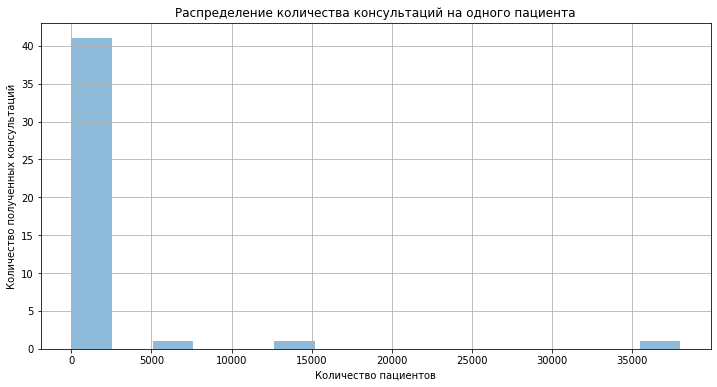

In [21]:
df_visits_by_patients['patients_amount'].hist(range=(0, 38000), bins=15, alpha=.50, figsize=(12, 6))
plt.title('Распределение количества консультаций на одного пациента')
plt.xlabel('Количество пациентов')
plt.ylabel('Количество полученных консультаций')

plt.show()

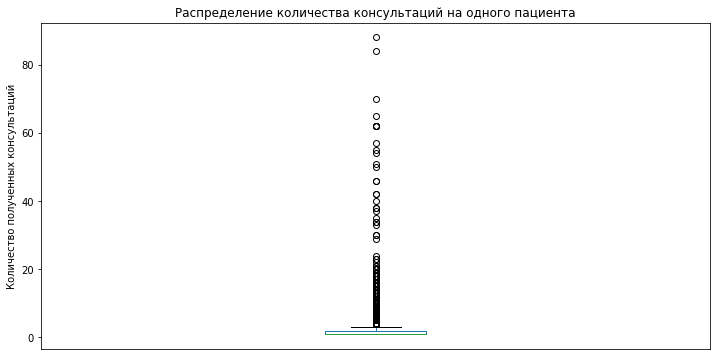

In [22]:
df_visits['cons_amount'].plot(kind='box', figsize=(12, 6), title='Распределение количества консультаций на одного пациента')

plt.ylabel('Количество полученных консультаций')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.show()

<div class="alert alert-block alert-success">
    <h2> Промежуточный итог:</h2>
<br/>  

Графики распределения консультаций ненаглядны (и плохи для восприятия), но по ним видно что основная масса пациентов получила меньше 5 консультаций, в то время как от 5 и выше консультаций получило довольно малое количество людей.
<br/> 
<br/>     
Добавим категории по количеству консультаций и построим новый график.
   
    
</div>

In [23]:
df_visits_by_patients['cons_cat'] = (
    df_visits_by_patients['cons_amount'].apply(lambda cons: 
                        (cons < 2 and 1) or 
                        (cons < 5 and 2) or 
                        (cons < 11 and 3) or 
                        (cons > 10 and 4) 
                   )
)

cons_cat_dict = {
    1: '1 консультация',
    2: '2-4 консультации',
    3: '5-10 консультация',
    4: 'Больше 10 консультаций на пациента'
}

In [24]:
df_visits_cat = df_visits_by_patients.groupby(['cons_cat'], as_index=False)[['patients_amount']].sum()

df_visits_cat['cons_cat_name'] = df_visits_cat['cons_cat'].apply(lambda x: cons_cat_dict[x])

df_visits_cat['regular_percent'] = round((df_visits_cat['patients_amount'] / df_visits_cat['patients_amount'].sum()) * 100, 2)

In [25]:
df_visits_cat[['cons_cat_name', 'patients_amount', 'regular_percent']]

,cons_cat_name,patients_amount,regular_percent
0,1 консультация,37542,60.80
1,2-4 консультации,21616,35.01
2,5-10 консультация,2343,3.79
3,Больше 10 консультаций на пациента,248,0.40


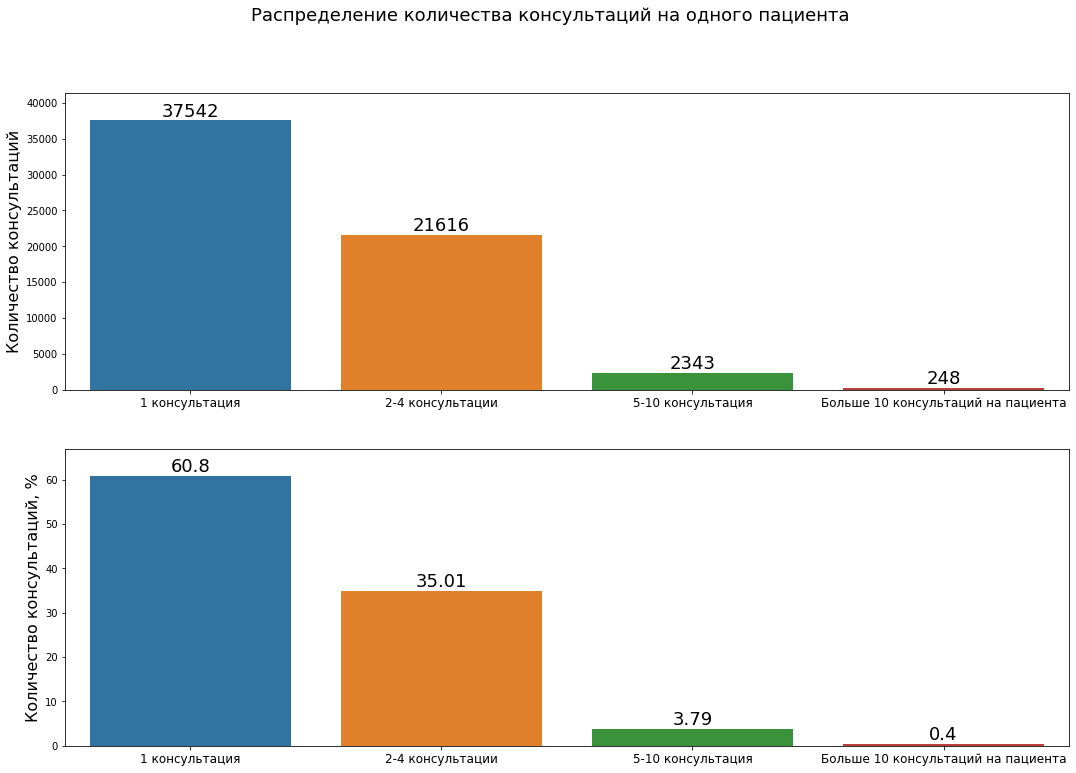

In [89]:
fig, axes = plt.subplots(2, 1, figsize=(18, 12))

# first
#ax = df_visits_cat[['cons_cat_name', 'patients_amount']].plot(ax=axes[0], kind='bar', x='cons_cat_name', legend=False)
ax = sns.barplot(data=df_visits_cat, ax=axes[0], x='cons_cat_name', y='patients_amount')

axes[0].set_ylabel('Количество консультаций', fontsize=16)
axes[0].set_xlabel('')
plt.setp(ax.get_xticklabels(), rotation=0, fontsize=12)


# annotate
ax.bar_label(ax.containers[0], label_type='edge', fontsize=18)
ax.margins(y=0.1)


# second
ax = df_visits_cat[['cons_cat_name', 'regular_percent']].plot(ax=axes[1], kind='bar', x='cons_cat_name', legend=False)
ax = sns.barplot(data=df_visits_cat, ax=axes[1], x='cons_cat_name', y='regular_percent')

axes[1].set_ylabel('Количество консультаций, %', fontsize=16)
axes[1].set_xlabel('')


# annotate
ax.bar_label(ax.containers[0], label_type='edge', fontsize=18)
ax.margins(y=0.1)

# suptitle
plt.suptitle('Распределение количества консультаций на одного пациента', fontsize=18)

plt.setp(ax.get_xticklabels(), rotation=0, fontsize=12)
plt.show()

<div class="alert alert-block alert-success">
    <h2> Промежуточный итог:</h2>
<br/>  

Как видно из графиков выше - основная масса пациентов (около 61%) ходили на приём к врачу лишь один раз. Остальные 39% посещают врачей регулярно.
   
    
</div>

## Task 5
If we have repeated visits, does the number (1st, 2nd, 3rd ...) of the reception somehow affect the turnout? Where absenteeism occurs more often, for regular visits or for one-off?

In [27]:
df = df.sort_values(by=['appointment_id', 'scheduled_day']).assign(ord=df.groupby(['patient_id']).cumcount())

df['ord'] = df['ord'].apply(lambda x: x + 1)
# df[df['patient_id'] == 67935754854294]

In [28]:
perc_repeat = np.percentile(df['ord'], [95, 99])
print(f'95% пациентов не ходили к врачу чаще чем {perc_repeat[0]} раз.')
print(f'99% пациентов не ходили к врачу чаще чем {perc_repeat[1]} раз.')

df_perc_repeat_clean = df[df['ord'] <= perc_repeat[1]]

95% пациентов не ходили к врачу чаще чем 6.0 раз.
99% пациентов не ходили к врачу чаще чем 16.0 раз.


In [97]:
def analyze_turnout(df, ttl=''):
    # group data
    df['percent'] = round(df['visited'] / df['total'] * 100, 2)
    display(df)

    # calculate metrics
    min_perc = df['percent'].min()
    max_perc = df['percent'].max()
    median_perc = df['percent'].median()
    mean_perc = df['percent'].mean()

    # print analysis
    print(f'Максимальная явка на {df[df["percent"] == max_perc]["ord"].reset_index(drop=True)[0]} консультацию - {max_perc}%.')
    print(f'Минимальная явка на {df[df["percent"] == min_perc]["ord"].reset_index(drop=True)[0]} консультацию - {min_perc}%.')

    print()
    print(f'Средняя явка - {mean_perc}%')
    print(f'Медиана явки - {median_perc}%')
    print()
    print()
    
    # plot    
    #ax = df.plot(kind='bar', x='ord', y='percent', figsize=(12, 6), legend=False)
    fig = plt.figure(figsize=(12, 6))
    
    # try / except to surpass solo-bar cases
    try:
        ax = sns.barplot(data=df, x='ord', y='percent', palette=colors_from_values(df['percent'], "Greens_d"))
    except:
        ax = sns.barplot(data=df, x='ord', y='percent', palette="Greens_d")

    plt.ylabel('Посещений, %', fontsize=12)
    plt.xlabel('№ консультации', fontsize=12)

    plt.xticks(rotation=0)

    # annotate
    ax.bar_label(ax.containers[0], label_type='edge')
    ax.margins(y=0.1)

    # label
    plt.title(f'{ttl}', fontsize=18)
    
    plt.show()

,ord,total,visited,percent
0,1,61749,49635,80.38
1,2,24207,19140,79.07
2,3,10412,8219,78.94
3,4,4945,3815,77.15
4,5,2591,1977,76.30
5,6,1482,1147,77.40
6,7,934,722,77.30
7,8,630,520,82.54
8,9,432,336,77.78
9,10,332,267,80.42


Максимальная явка на 16 консультацию - 89.61%.
Минимальная явка на 5 консультацию - 76.3%.

Средняя явка - 80.26374999999999%
Медиана явки - 79.255%




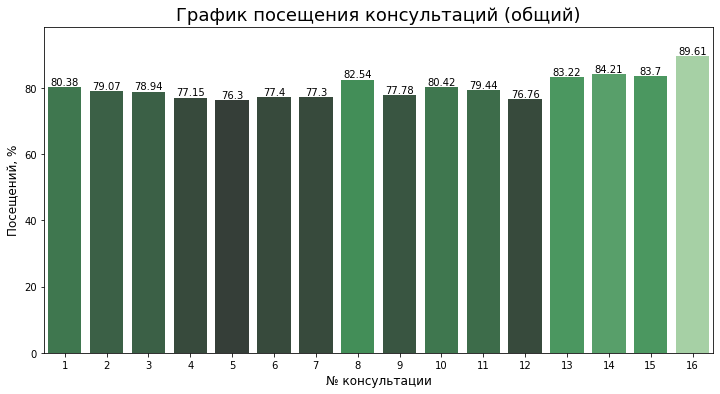

In [98]:
analyze_turnout(
    df_perc_repeat_clean.groupby('ord').agg(total=('show', 'count'), visited=('show', 'sum')).reset_index(),
    ttl='График посещения консультаций (общий)'
)

<div class="alert alert-block alert-success">
    <h2> Промежуточный итог:</h2>
<br/>  

Средняя явка (если просто пронумеровать консультации по порядку в разрезе пациентов) составляет 79%.
   
    
</div>

In [99]:
patients_repeat = list(df_perc_repeat_clean[df_perc_repeat_clean['ord'] > 1]['patient_id'])

,ord,total,visited,percent
0,1,24207,19161,79.15
1,2,24207,19140,79.07
2,3,10412,8219,78.94
3,4,4945,3815,77.15
4,5,2591,1977,76.30
5,6,1482,1147,77.40
6,7,934,722,77.30
7,8,630,520,82.54
8,9,432,336,77.78
9,10,332,267,80.42


Максимальная явка на 16 консультацию - 89.61%.
Минимальная явка на 5 консультацию - 76.3%.

Средняя явка - 80.18687499999999%
Медиана явки - 79.11%




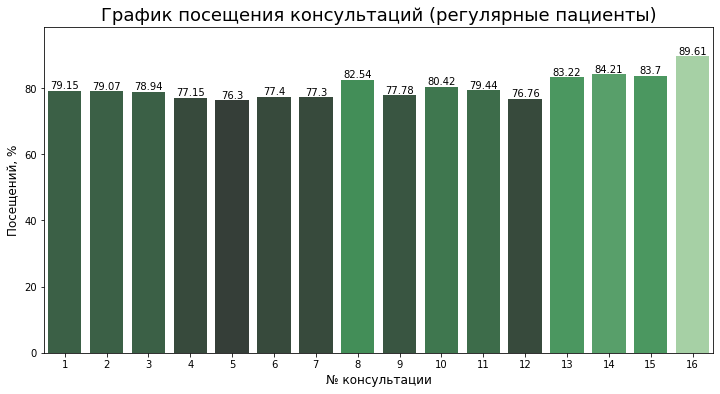

In [100]:
analyze_turnout(
    df_perc_repeat_clean[df_perc_repeat_clean['patient_id'].isin(patients_repeat)]
    .groupby('ord')
    .agg(total=('show', 'count'), visited=('show', 'sum'))
    .reset_index(),
    ttl='График посещения консультаций (регулярные пациенты)'
)

<div class="alert alert-block alert-success">
    <h2> Промежуточный итог:</h2>
<br/>  

Данные по явке регулярных пациентов не сильно отличаются от общего тренда.
   
    
</div>

,ord,total,visited,percent
0,1,37542,30474,81.17


Максимальная явка на 1 консультацию - 81.17%.
Минимальная явка на 1 консультацию - 81.17%.

Средняя явка - 81.17%
Медиана явки - 81.17%




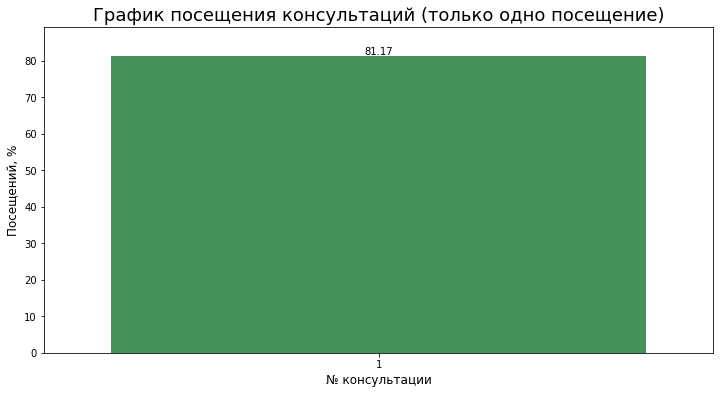

In [101]:
analyze_turnout(
    df_perc_repeat_clean[~df_perc_repeat_clean['patient_id'].isin(patients_repeat)]
    .groupby('ord')
    .agg(total=('show', 'count'), visited=('show', 'sum'))
    .reset_index(),
    ttl='График посещения консультаций (только одно посещение)'
)

<div class="alert alert-block alert-success">
    <h2> Промежуточный итог:</h2>
<br/>  

Явка пациентов, которые записались всего на 1 консультацию немного выше общей тенденции - 81% против 78%.
   
    
</div>

## Task 6
Explore the effect of age on turnout

In [34]:
df['age_cat'] = (
    df['age'].apply(lambda age: 
                        (age < 10 and 1) or 
                        (age < 20 and 2) or 
                        (age < 30 and 3) or 
                        (age < 40 and 4) or 
                        (age < 50 and 5) or 
                        (age < 60 and 6) or 
                        (age < 70 and 7) or
                        (age >= 70 and 8)
                   )
)

age_cat_dict = {
    1: 'Дети до 10 лет',
    2: 'Подростки (10-19)',
    3: '20-29 лет',
    4: '30-39 лет',
    5: '40-49 лет',
    6: '50-59 лет',
    7: '60-69 лет',
    8 : '70 и старше'
}

In [35]:
def build_all_subplots(df, values, dictionary, x, y, colors, btm_title, sp_title=None):
    k = 0
        
    for i in range(x // 2):
        for j in range(y):
            ax = df[df['age_cat'] == values[k]]['show'].value_counts().sort_index().plot.bar(ax=axes[i][j], color=colors[k])
            axes[i][j].set_title(dictionary[values[k]], fontsize=12)
            axes[i][j].set_xticklabels(['Пропустили', 'Посетили'], rotation='horizontal')
                            
            k += 1
            
            # annotate
            ax.bar_label(ax.containers[0], label_type='edge')
            ax.margins(y=0.1)
                 
    k = 0
    for i in range(x // 2, x):
        for j in range(y):
            ax = (
                round(
                    df[df['age_cat'] == values[k]]['show']
                    .value_counts()
                    .sort_index() / df[df['age_cat'] == values[k]]['show']
                                    .count() * 100, 2
                )
            ).plot.bar(
                ax=axes[i][j], 
                color=colors[k]
            )
            
            axes[i][j].set_title(dictionary[values[k]], fontsize=12)
            axes[i][j].set_xticklabels(['Пропустили', 'Посетили'], rotation='horizontal')
                            
            k += 1
            
            # annotate
            ax.bar_label(ax.containers[0], label_type='edge')
            ax.margins(y=0.1)    
            

    # bottom
    axes[0][0].set_ylabel(f'{btm_title}', rotation='vertical', fontsize=16)
    axes[1][0].set_ylabel(f'{btm_title}', rotation='vertical', fontsize=16)
    
    axes[2][0].set_ylabel(f'{btm_title}, %', rotation='vertical', fontsize=16)
    axes[3][0].set_ylabel(f'{btm_title}, %', rotation='vertical', fontsize=16)
    # suptitle
    if not sp_title:
        fig.suptitle('Гистограмы посещения консультаций', fontsize=18)
    else:
        fig.suptitle(f'Гистограмы посещения консультаций {sp_title}', fontsize=18)
                        
colors = ['green', 'blue', 'darkgreen', 'lightblue', 'gray', 'black', 'pink', 'darkgray']   

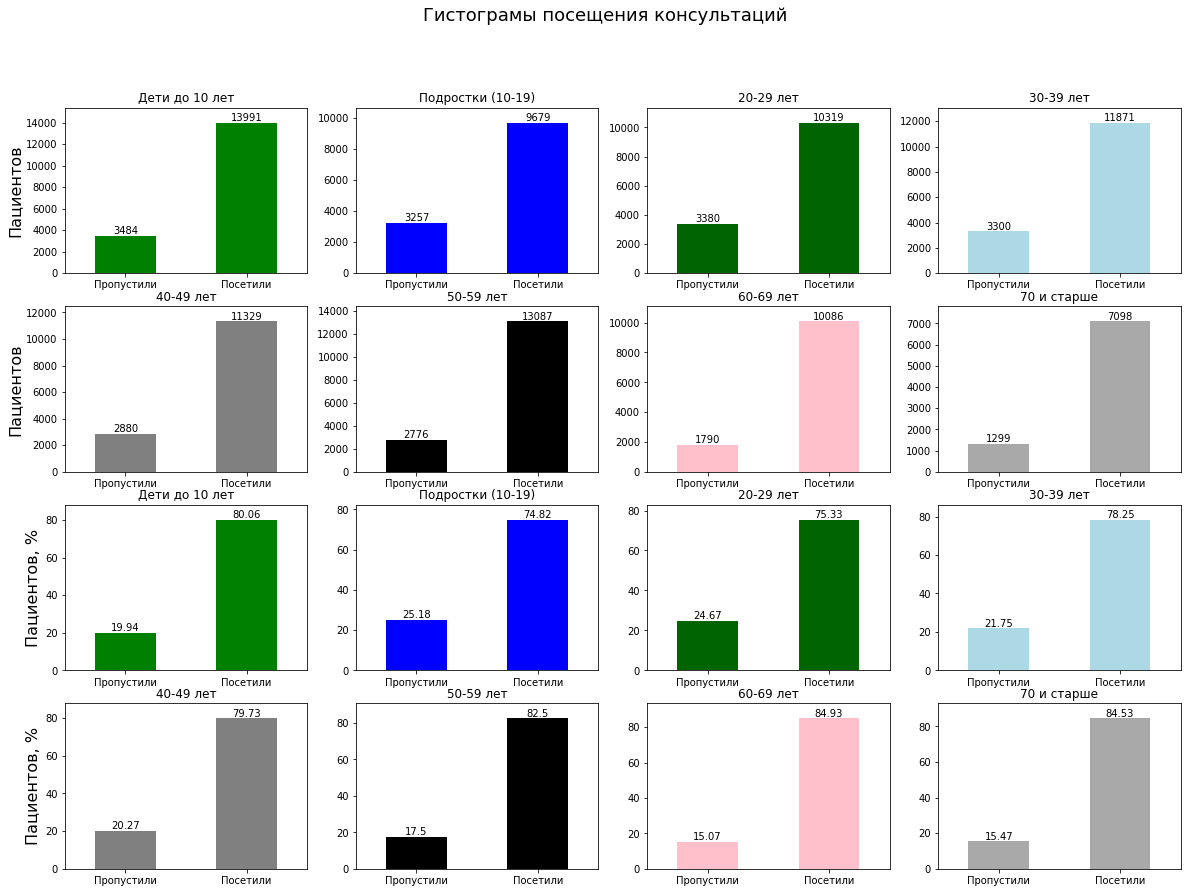

In [36]:
fig, axes = plt.subplots(4, 4, figsize=(20, 14))

build_all_subplots(
    df, 
    sorted(df['age_cat'].unique()),
    age_cat_dict,
    4, 4,
    colors,
    'Пациентов'
)

<div class="alert alert-block alert-success">
    <h2> Промежуточный итог:</h2>
<br/>  

Лучшая явка у старшего поколения (50+ лет) - 82-85%.
<br/> 
Хуже всего дела обстоят у подростков и молодых людей (10-29 лет) - их явка всего лишь около 75%.    
   
    
</div>

#### Task 7
For the breakdown by age, add a breakdown by gender. Maybe one gender skips receptions more often than the other? In all age groups, we can confidently compare the chance of missing (in other words, is there a bias in any of the groups towards men or women in the number of appointments)?

In [37]:
df_gender = df.groupby(['gender', 'age_cat']).agg(total=('show', 'count'), visited=('show', 'sum')).reset_index()
df_gender['percent'] = round(df_gender['visited'] / df_gender['total'] * 100, 2)

In [38]:
def gender_analytic(df, gender):
    if gender == 'F':
        print('Данные по женщинам')
    elif gender == 'M':
        print('Данные по мужчинам')
    else:
        return False
    
    display(df[df['gender'] == gender].reset_index(drop=True))

    # calculate metrics
    min_perc = df_gender[df_gender['gender'] == gender]['percent'].min()
    max_perc = df_gender[df_gender['gender'] == gender]['percent'].max()
    mean_perc = df_gender[df_gender['gender'] == gender]['percent'].mean()
    median_perc = df_gender[df_gender['gender'] == gender]['percent'].median()
    
    print()
    # print analysis
    print(f'Максимальная явка в категории {age_cat_dict[df[df["percent"] == max_perc]["age_cat"].reset_index(drop=True)[0]]} - {max_perc}%.')
    print(f'Минимальная явка в категории {age_cat_dict[df[df["percent"] == min_perc]["age_cat"].reset_index(drop=True)[0]]} - {min_perc}%.')

    print()
    print(f'Средняя явка - {mean_perc}%')
    print(f'Медиана явки - {median_perc}%')
    
    print()
    print(f"Общая явка (по всем категориям) - {round((df[df['gender'] == gender]['visited'].sum() / df[df['gender'] == gender]['total'].sum() * 100), 2)}%")
    
    print()
    print()

Данные по женщинам


,gender,age_cat,total,visited,percent
0,F,1,8295,6646,80.12
1,F,2,7782,5841,75.06
2,F,3,10130,7605,75.07
3,F,4,10767,8442,78.41
4,F,5,9777,7754,79.31
5,F,6,10801,8910,82.49
6,F,7,8058,6794,84.31
7,F,8,5584,4719,84.51



Максимальная явка в категории 70 и старше - 84.51%.
Минимальная явка в категории Подростки (10-19) - 75.06%.

Средняя явка - 79.91%
Медиана явки - 79.715%

Общая явка (по всем категориям) - 79.66%




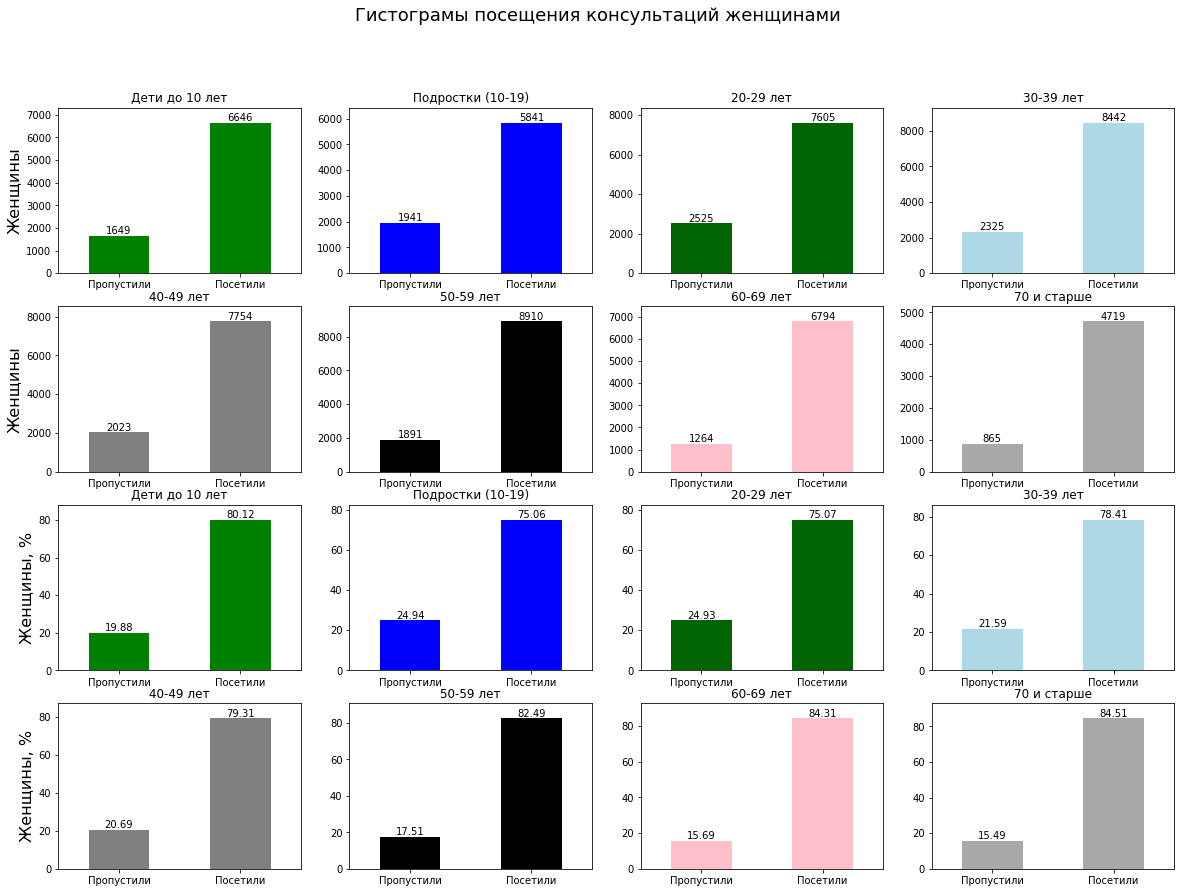

In [39]:
gender_analytic(df_gender, 'F')

fig, axes = plt.subplots(4, 4, figsize=(20, 14))

build_all_subplots(
    df[df['gender'] == 'F'], 
    sorted(df[df['gender'] == 'F']['age_cat'].unique()),
    age_cat_dict,
    4, 4,
    colors,
    'Женщины',
    'женщинами'
)

Данные по мужчинам


,gender,age_cat,total,visited,percent
0,M,1,9180,7345,80.01
1,M,2,5154,3838,74.47
2,M,3,3569,2714,76.04
3,M,4,4404,3429,77.86
4,M,5,4432,3575,80.66
5,M,6,5062,4177,82.52
6,M,7,3818,3292,86.22
7,M,8,2813,2379,84.57



Максимальная явка в категории 60-69 лет - 86.22%.
Минимальная явка в категории Подростки (10-19) - 74.47%.

Средняя явка - 80.29375000000002%
Медиана явки - 80.33500000000001%

Общая явка (по всем категориям) - 80.01%




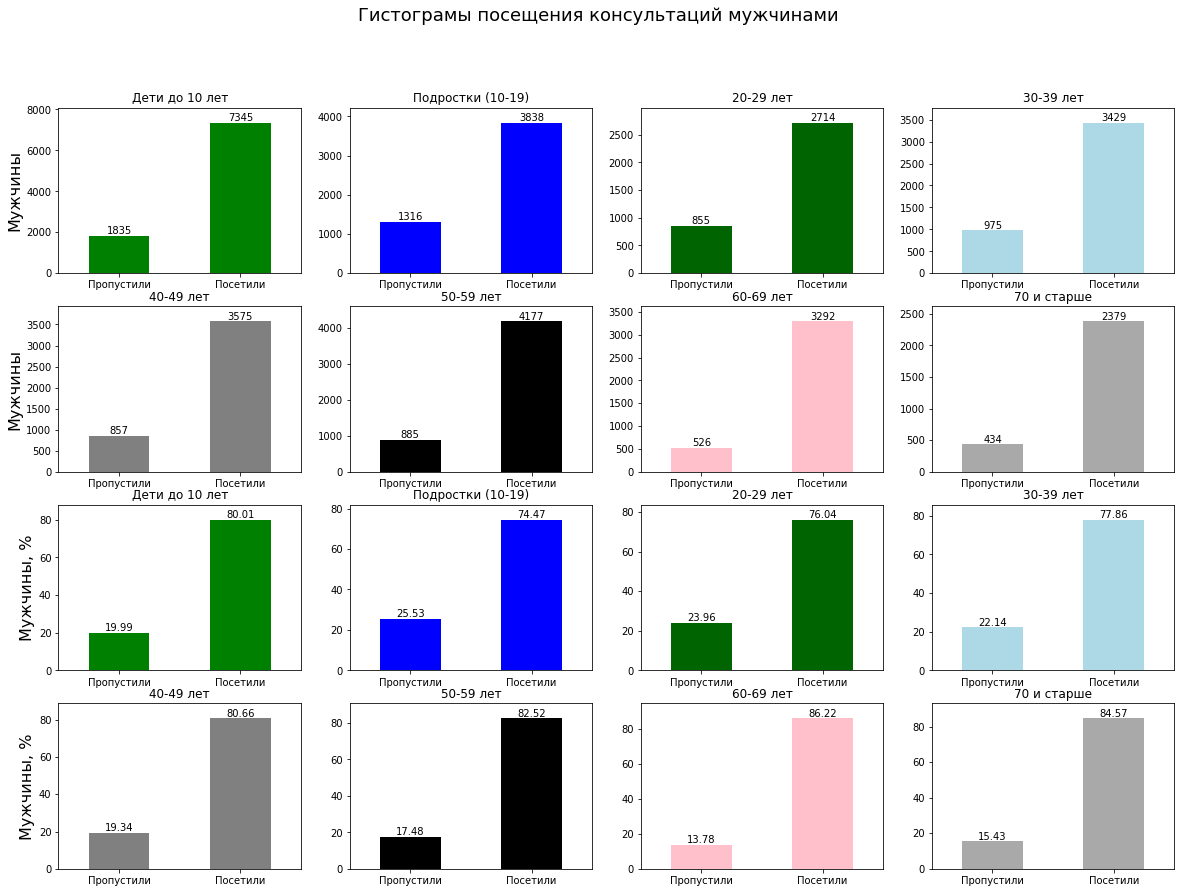

In [40]:
gender_analytic(df_gender, 'M')

fig, axes = plt.subplots(4, 4, figsize=(20, 14))

build_all_subplots(
    df[df['gender'] == 'M'], 
    sorted(df[df['gender'] == 'F']['age_cat'].unique()),
    age_cat_dict,
    4, 4,
    colors,
    'Мужчины',
    'мужчинами'
)

In [41]:
len(age_cat_dict)

8

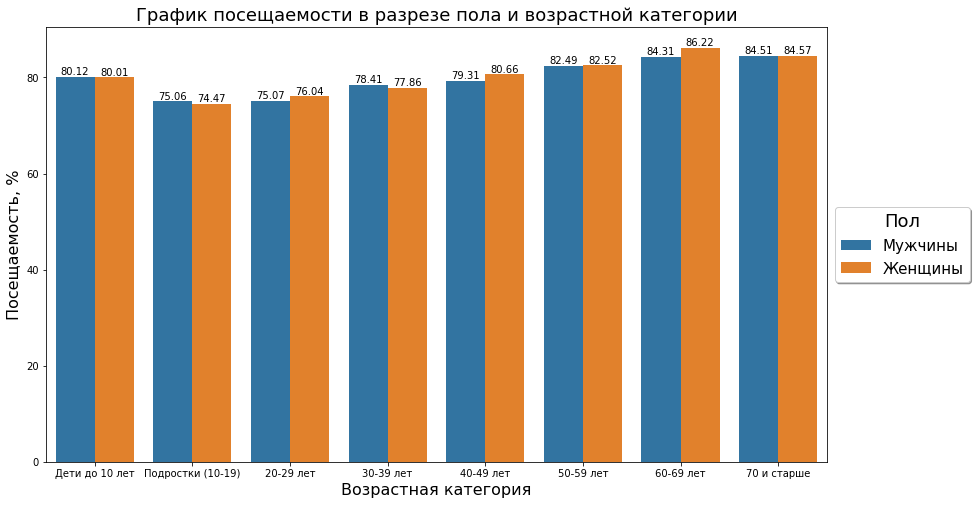

In [103]:
fig = plt.figure(figsize=(14, 8))

ax = sns.barplot(
    data=df_gender,
    x = 'age_cat',
    y = 'percent', 
    hue = 'gender'
)

# annotate
for container in ax.containers:
    ax.bar_label(container)

# labels
plt.ylabel('Посещаемость, %', fontsize=16)    
plt.xlabel('Возрастная категория', fontsize=16)  

# ticks
plt.xticks(range(len(age_cat_dict)), [x for x in age_cat_dict.values()])

# legend
L=ax.legend(
    title="Пол",
    title_fontsize = 18,
    shadow=True,
    fontsize=15,
    loc='center left', bbox_to_anchor=(1, 0.5)
)

L.get_texts()[0].set_text('Мужчины')
L.get_texts()[1].set_text('Женщины')

plt.title('График посещаемости в разрезе пола и возрастной категории', fontsize=18)

fig.show()

## Task 8
Investigate the effect of waiting time on attendance. You can use the same approach as in task 5.

In [43]:
df['waiting_time'] = (df['appointment_day'].dt.date - df['scheduled_day'].dt.date).astype('timedelta64[D]')
df['waiting_time'] = df['waiting_time'].astype(int)

In [44]:
df[df['waiting_time'] < 0]

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show,ord,age_cat,waiting_time
71782,3787481966821,5655637,M,2016-05-04 06:50:57,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,0,1,1,-1
63709,24252258389979,5664962,F,2016-05-05 13:43:58,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,0,2,3,-1
26850,7839272661752,5679978,M,2016-05-10 10:51:53,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,0,2,4,-1
70960,998231581612122,5686628,F,2016-05-11 13:49:20,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,0,2,8,-6
54818,7896293967868,5715660,F,2016-05-18 14:50:41,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,0,5,2,-1


In [45]:
df_wait = df[df['waiting_time'] >= 0].copy()

df_wait['waiting_time'].describe()

count    109621.000000
mean         10.164476
std          15.181703
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: waiting_time, dtype: float64

In [46]:
perc_wait = np.percentile(df['waiting_time'], [95, 99])
print(f'95% пациентов не записывались на консультацию ранее чем за {perc_wait[0]} дней.')
print(f'99% пациентов не записывались на консультацию ранее чем за {perc_wait[1]} дней.')

# здесь избавимся от данных по 95% границе
df_wait_clean = df_wait[df_wait['waiting_time'] <= perc_wait[0]]

95% пациентов не записывались на консультацию ранее чем за 39.0 дней.
99% пациентов не записывались на консультацию ранее чем за 68.0 дней.


In [47]:
df_wait_clean

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show,ord,age_cat,waiting_time
2269,411584224594358,5491952,M,2016-03-21 07:10:20,2016-04-29,36,BELA VISTA,0,0,0,0,0,1,0,1,4,39
2258,8393479787664,5492518,F,2016-03-21 07:39:20,2016-04-29,28,BELA VISTA,0,0,0,0,0,1,1,1,3,39
2263,3176624936221,5492883,F,2016-03-21 08:01:45,2016-04-29,37,BELA VISTA,0,1,0,0,0,1,1,1,4,39
2273,8612884747373,5493135,F,2016-03-21 08:17:53,2016-04-29,43,BELA VISTA,0,0,0,0,0,1,0,1,5,39
1839,61598244731876,5493345,F,2016-03-21 08:30:09,2016-04-29,30,RESISTÊNCIA,0,0,0,0,0,1,1,1,4,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91666,729255235141745,5790461,M,2016-06-08 19:32:25,2016-06-08,54,JARDIM CAMBURI,0,0,0,0,0,0,1,6,6,0
87419,947614361749238,5790464,F,2016-06-08 19:32:56,2016-06-08,43,JARDIM CAMBURI,0,0,0,0,0,0,1,3,5,0
87420,356247857784,5790466,M,2016-06-08 19:33:23,2016-06-08,27,JARDIM CAMBURI,0,0,0,0,0,0,1,2,3,0
86497,234131759175,5790481,F,2016-06-08 19:58:52,2016-06-08,30,JARDIM CAMBURI,0,0,0,0,0,0,1,2,4,0


In [106]:
def analyze_wait(df):
    # group data
    df['percent'] = round(df['visited'] / df['total'] * 100, 2)
    display(df)

    # calculate metrics
    min_perc = df['percent'].min()
    max_perc = df['percent'].max()
    median_perc = df['percent'].median()
    mean_perc = df['percent'].mean()

    # print analysis
    print(f'Максимальная явка на {df[df["percent"] == max_perc]["waiting_time"].reset_index(drop=True)[0]} день записи - {max_perc}%.')
    print(f'Минимальная явка на {df[df["percent"] == min_perc]["waiting_time"].reset_index(drop=True)[0]} день записи - {min_perc}%.')

    print()
    print(f'Средняя явка - {round(mean_perc, 2)}%')
    print(f'Медиана явки - {median_perc}%')
    print()
    print()
    
    # plot
    #ax = df.plot(kind='bar', x='waiting_time', y='percent', figsize=(12, 6), legend=False)  
    fig = plt.figure(figsize=(18, 8))
    ax = sns.barplot(data=df, x='waiting_time', y='percent', palette=colors_from_values(df['percent'], "Greens_d"))

    plt.ylabel('Посещаемость, %', fontsize=16)
    plt.xlabel('День записи (0 - день в день)', fontsize=18)

    plt.xticks(rotation=0)

    # annotate
    ax.bar_label(ax.containers[0], label_type='edge', fontsize=8)
    ax.margins(y=0.1)
    
    # title
    plt.title('График явки в разрезе дней ожидания', fontsize=18)

    plt.show()

,waiting_time,total,visited,percent
0,0,38277,36494,95.34
1,1,5149,4051,78.68
2,2,6658,5074,76.21
3,3,2702,2065,76.42
4,4,5249,4023,76.64
5,5,3241,2373,73.22
6,6,4002,3012,75.26
7,7,4880,3577,73.30
8,8,2322,1654,71.23
9,9,1599,1160,72.55


Максимальная явка на 0 день записи - 95.34%.
Минимальная явка на 25 день записи - 59.84%.

Средняя явка - 69.4%
Медиана явки - 68.24000000000001%




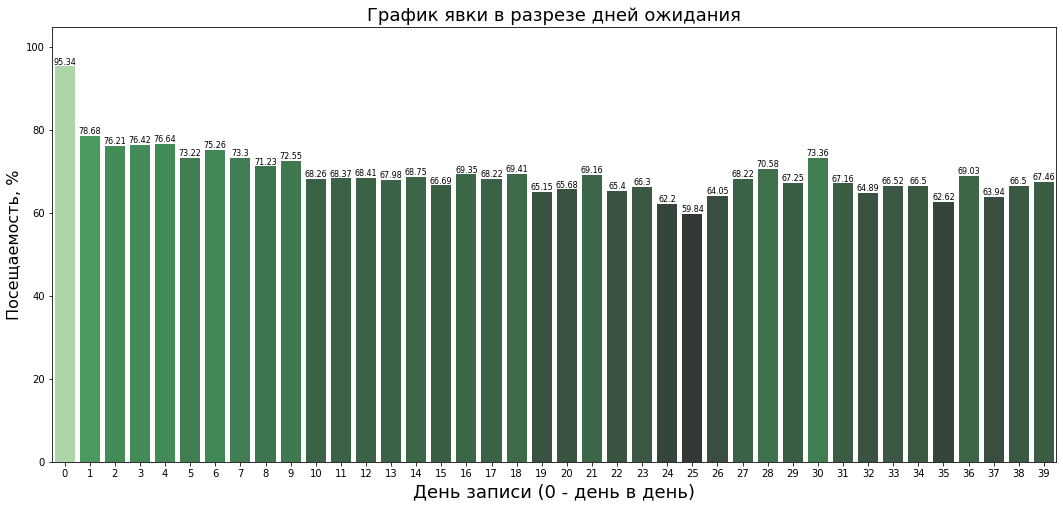

In [107]:
temp = df_wait_clean.groupby('waiting_time').agg(total=('show', 'count'), visited=('show', 'sum')).reset_index()
analyze_wait(temp)

In [108]:
temp['percent'] = round(temp['visited'] / temp['total'] * 100, 2)
temp_median_perc = temp['percent'][1:].median()

print(f'Медиана явки (без 1-го дня) - {temp_median_perc}%')

Медиана явки (без 1-го дня) - 68.22%


<div class="alert alert-block alert-success">
    <h2> Промежуточный итог:</h2>
<br/>  

Лучшая явка "день-в-день" - 95%. Если запись была на следующий день (и далее) то процент явки сразу падает почти на 20%.
<br/> 
Начиная с 10-го дня явка падает ниже 70% (за исключением 2-х дней) и в среднем (по медиане) составляет 68%.
   
    
</div>

## Task 9
In general, for the sample, does SMS affect turnout?

In [50]:
df_sms = df.groupby(['sms_received']).agg(total=('show', 'count'), visited=('show', 'sum')).reset_index()
df_sms['percent'] = round(df_sms['visited'] / df_sms['total'] * 100, 2)

df_sms

,sms_received,total,visited,percent
0,0,74374,61948,83.29
1,1,35252,25512,72.37


In [128]:
def plot_sms(df, sup_ttl=''):
    fig = plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=df, x='percent', y='sms_received', orient='h')

    # suptitle
    if sup_ttl:
        plt.suptitle(f'{sup_ttl}', fontsize=18)

    plt.xlabel('Посещаемость, %', fontsize=18)
    plt.xticks(rotation=0)

    plt.ylabel('Получили СМС', fontsize=16)
    plt.yticks(range(2), ['Нет', 'Да'], fontsize=14)

    # annotate
    ax.bar_label(ax.containers[0], label_type='center', fontsize=26)
    ax.margins(y=0.1)

    plt.show()

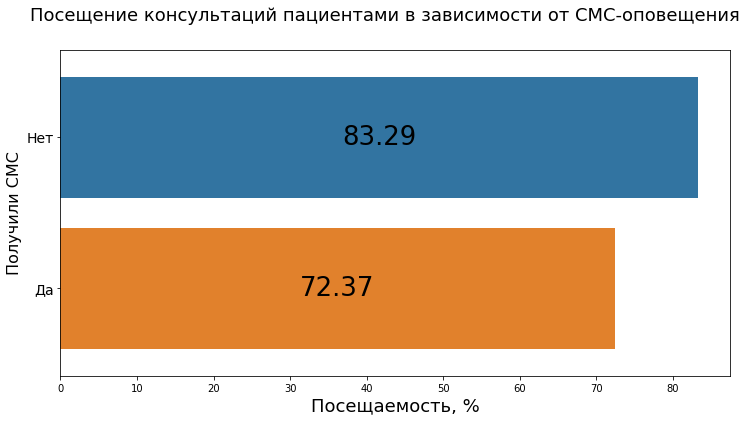

In [129]:
plot_sms(df_sms, sup_ttl='Посещение консультаций пациентами в зависимости от СМС-оповещения')

<div class="alert alert-block alert-success">
    <h2> Промежуточный итог:</h2>
<br/>  

Пациенты, которым пришло СМС-оповещение, в общей массе хуже посещают консультации, чем пациенты которым уведомление не приходило. 
<br/>     
Предварительно можно предположить что либо данные по СМС-оповещениям некорректны, либо дело в самих СМС.   
    
</div>

#### Task 10
Investigate the impact of texting on truant turnout. A truant is someone who missed an appointment at least once.

Are these conclusions correct for those patients who had more than 1 entry (> = 5 entries)?

In [126]:
# at least one missed appointment
truant_1 = list(df[df['show'] == 0]['patient_id'].unique())

# at least one missed appointment and total appointment amount >= 5
truant_5 = list(df
                [
                    (df['show'] == 0)
                    &
                    (df['ord'] >= 5)
                ]['patient_id'].unique()
               )

def calc_truant(df, truant):
    df = df[df['patient_id'].isin(truant)].groupby(['sms_received']).agg(total=('show', 'count'), visited=('show', 'sum')).reset_index()
    df['percent'] = round(df['visited'] / df['total'] * 100, 2)
    
    return df

# calc
df_truant_1 =  calc_truant(df, truant_1)
df_truant_5 =  calc_truant(df, truant_5)

# display
display(df_truant_1)
display(df_truant_5)

,sms_received,total,visited,percent
0,0,27255,14829,54.41
1,1,15494,5754,37.14


,sms_received,total,visited,percent
0,0,6288,4491,71.42
1,1,2326,1316,56.58


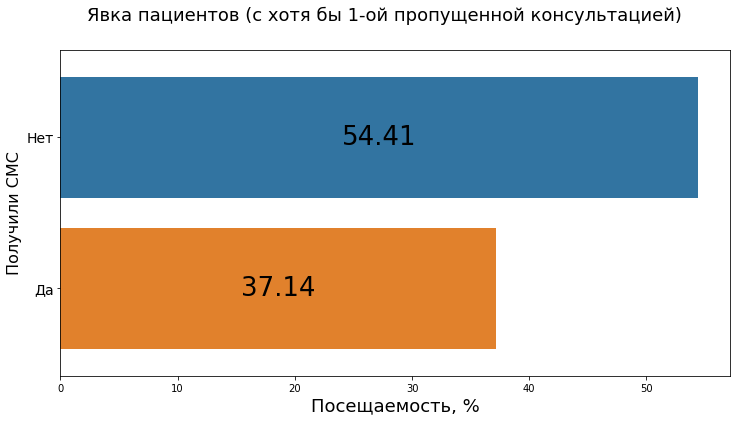

In [135]:
plot_sms(df_truant_1, sup_ttl='Явка пациентов (с хотя бы 1-ой пропущенной консультацией)')

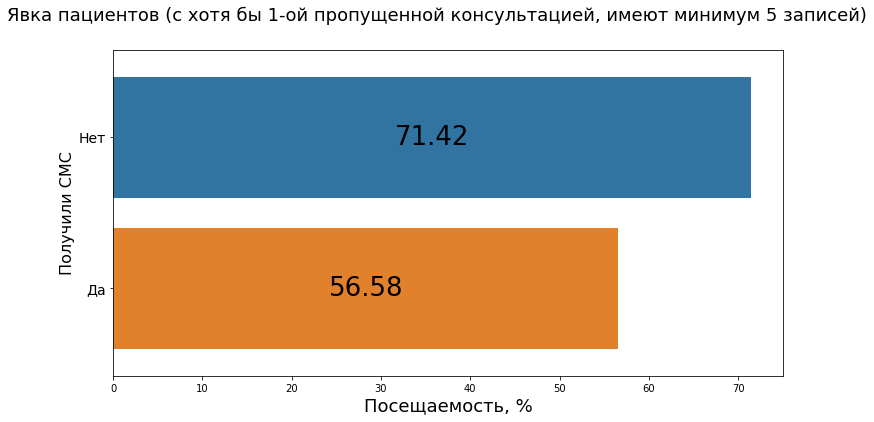

In [136]:
plot_sms(df_truant_5, sup_ttl='Явка пациентов (с хотя бы 1-ой пропущенной консультацией, имеют минимум 5 записей)')

### Task 11
Conduct a cohort analysis for customers of the online store, displaying retention (the percentage of customers in the cohort in the period 1-2-3, etc.).


Data for work can be downloaded via the [link](https://drive.google.com/file/d/1K5LLBiCZ6p_34ANiMo0rI46xMdP5ZfRT/view?usp=sharing). This is data on the sales of goods from one online store, the data contains the number of the receipt, the number of the item in the warehouse, its description, the number of items in the check line, date, price per unit, customer ID, as well as the country in which the sale took place.

In [51]:
url = 'https://drive.google.com/file/d/1K5LLBiCZ6p_34ANiMo0rI46xMdP5ZfRT/view'
path = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]
data: pd.DataFrame = pd.read_csv(path, encoding='latin1')

In [52]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [54]:
# находим заказы быз ИД покупателей
lost_customers = list(data[data['CustomerID'].isna()]['InvoiceNo'].unique())
# проверяем есть ли среди этих заказов ИД покупателей (чтобы на основе них заполнить пропуски)
print(len(data[(data['InvoiceNo'].isin(lost_customers)) & (data['CustomerID'].notna())]))

0


In [55]:
# заполнить пропуски не получиться - избавляемся от них
data = data[~data['CustomerID'].isna()].reset_index(drop=True)

In [56]:
# to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
# astype
data['CustomerID'] = data['CustomerID'].astype(int)

### COHORT ANALYSIS

In [57]:
# находим дату первого заказа по каждому покупателю
first_visit = data.groupby(['CustomerID'])['InvoiceDate'].min().reset_index()
first_visit.columns = ['CustomerID', 'first_visit']
first_visit.head()

,CustomerID,first_visit
0,12346,2011-01-18 10:01:00
1,12347,2010-12-07 14:57:00
2,12348,2010-12-16 19:09:00
3,12349,2011-11-21 09:51:00
4,12350,2011-02-02 16:01:00


In [58]:
# добавляем данные по дате первой покупки
data = data.merge(first_visit)

# добавляем месяц первой покупки
data['first_visit_month'] = data['first_visit'].astype('datetime64[M]')
# добавляем месяц текущей покупки
data['visit_month'] = data['InvoiceDate'].astype('datetime64[M]')

# считаем текущую когорту (месяц текущего посещения - месяц первого посещения)
data['lifetime'] = (data['visit_month'] - data['first_visit_month']) / np.timedelta64(1, 'M')
data['lifetime'] = data['lifetime'].round().astype('int')

# группируем данные по первому месяцу посещения и по когортам, подсчитывая количество уникальных покупателей
cohort_visits = data.groupby(['first_visit_month', 'lifetime']).agg({'CustomerID': 'nunique'}).reset_index()

# фильтруем получившуюся таблицу по первой (нулевой) когорте, оставляя только данные по уникальным покупателям
f_uid = cohort_visits[cohort_visits['lifetime'] == 0][['first_visit_month', 'CustomerID']]
f_uid.columns = ['first_visit_month', 'f_CustomerID']

# соединяем первую (нулевую) когорту со всему когортами
cohort_visits = cohort_visits.merge(f_uid)

# считаем процентное соотношение по когортам (отношение вернувшихся покупателей к нулевой когорте)
cohort_visits['retention'] = cohort_visits['CustomerID'] / cohort_visits['f_CustomerID']

# строим сводную таблицу по месяцу первого посещения в разрезе когорт
visits_retention_pivot = cohort_visits.pivot_table(index='first_visit_month', 
                                                   columns='lifetime', values='retention', aggfunc='sum')

In [59]:
visits_retention_pivot

lifetime,0,1,2,3,4,5,6,7,8,9,10,11,12
first_visit_month,,,,,,,,,,,,,
2010-12-01,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
2011-01-01,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
2011-02-01,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
2011-03-01,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
2011-04-01,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


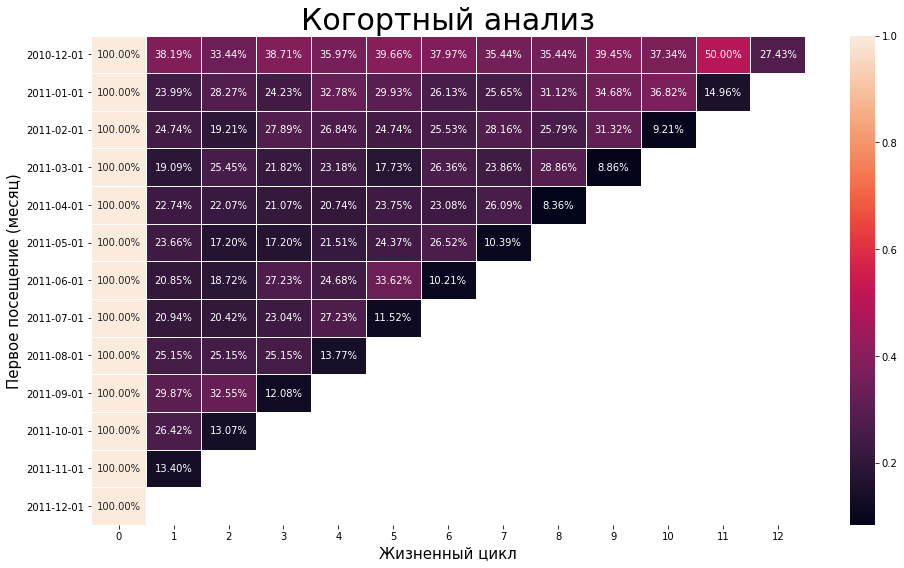

In [60]:
plt.figure(figsize = (16, 9))
plt.title('Когортный анализ', fontsize=30)
ax = sns.heatmap(visits_retention_pivot, annot=True, fmt='.2%', linewidths=1, linecolor='white')
ax.set_yticklabels(visits_retention_pivot.index.date)

ax.set_ylabel('Первое посещение (месяц)', fontsize=15)
ax.set_xlabel('Жизненный цикл', fontsize=15)

plt.show()

<div class="alert alert-block alert-success">
    <h2>Заключение по когортному анализу:</h2>
<br/>  

- Основная масса покупателей (около 80%) перестают пользоваться сервисом после первого месяца;
<br/>
- Оставшиеся пользователи становятся +- постоянными (отток либо очень маленький либо наоборот - наблюдается приток);
<br/>    
- Исключение состаявляет 1-ая когорта - у неё самый маленький отток по сравнению с другими когортами, а количество действующих покупателей не падает ниже 30% (за исключением последнего месяца);
<br/>    
- Под Новый Год (декабрь 2011) наблюдается колоссальный отток покупателей по всем когортам (их становится в 2.5-3 раза меньше по сравнению с предыдущим периодом).
    
</div>